In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = '2010-01-01'
end = '2019-12-31'

df = data.DataReader('GOOGL', 'stooq', start, end)
df = df[::-1]

df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,15.6740,15.7380,15.6060,15.6690,78248000.0
2010-01-05,15.6795,15.6960,15.5385,15.6000,120188000.0
2010-01-06,15.6465,15.6465,15.1590,15.2065,159148000.0
2010-01-07,15.2350,15.2500,14.8160,14.8525,256572000.0
2010-01-08,14.8000,15.0810,14.7280,15.0505,188972000.0


In [3]:
df = df.reset_index()
df.head()


,Date,Open,High,Low,Close,Volume
0,2010-01-04,15.6740,15.7380,15.6060,15.6690,78248000.0
1,2010-01-05,15.6795,15.6960,15.5385,15.6000,120188000.0
2,2010-01-06,15.6465,15.6465,15.1590,15.2065,159148000.0
3,2010-01-07,15.2350,15.2500,14.8160,14.8525,256572000.0
4,2010-01-08,14.8000,15.0810,14.7280,15.0505,188972000.0


In [4]:
df = df.drop(['Date'], axis=1)
df.head()


,Open,High,Low,Close,Volume
0,15.6740,15.7380,15.6060,15.6690,78248000.0
1,15.6795,15.6960,15.5385,15.6000,120188000.0
2,15.6465,15.6465,15.1590,15.2065,159148000.0
3,15.2350,15.2500,14.8160,14.8525,256572000.0
4,14.8000,15.0810,14.7280,15.0505,188972000.0


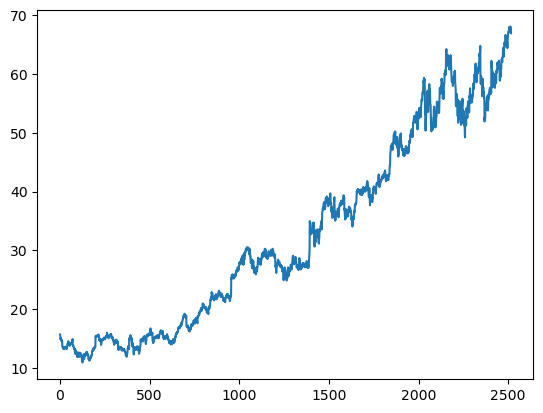

In [5]:
plt.plot(df.Close)

In [6]:
df

,Open,High,Low,Close,Volume
0,15.6740,15.7380,15.6060,15.6690,78248000.0
1,15.6795,15.6960,15.5385,15.6000,120188000.0
2,15.6465,15.6465,15.1590,15.2065,159148000.0
3,15.2350,15.2500,14.8160,14.8525,256572000.0
4,14.8000,15.0810,14.7280,15.0505,188972000.0
...,...,...,...,...,...
2511,67.5105,67.6005,67.2085,67.2215,13468200.0
2512,67.3275,68.1600,67.2755,68.1235,23676000.0
2513,68.2000,68.3535,67.6500,67.7320,23217460.0
2514,67.8405,67.8500,66.8920,66.9855,20011840.0


In [7]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2511    62.59886
2512    62.70272
2513    62.79450
2514    62.87640
2515    62.94300
Name: Close, Length: 2516, dtype: float64

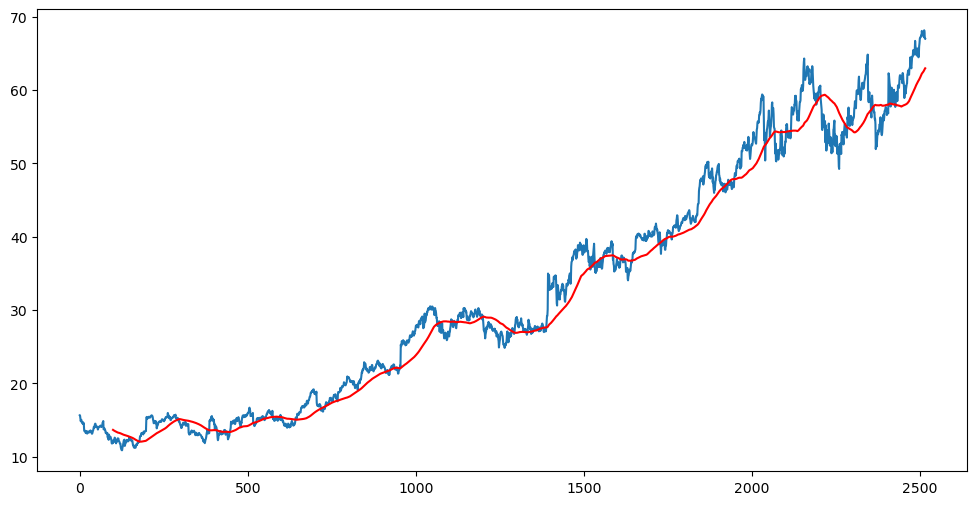

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [9]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2511    60.367350
2512    60.408202
2513    60.448730
2514    60.486083
2515    60.523792
Name: Close, Length: 2516, dtype: float64

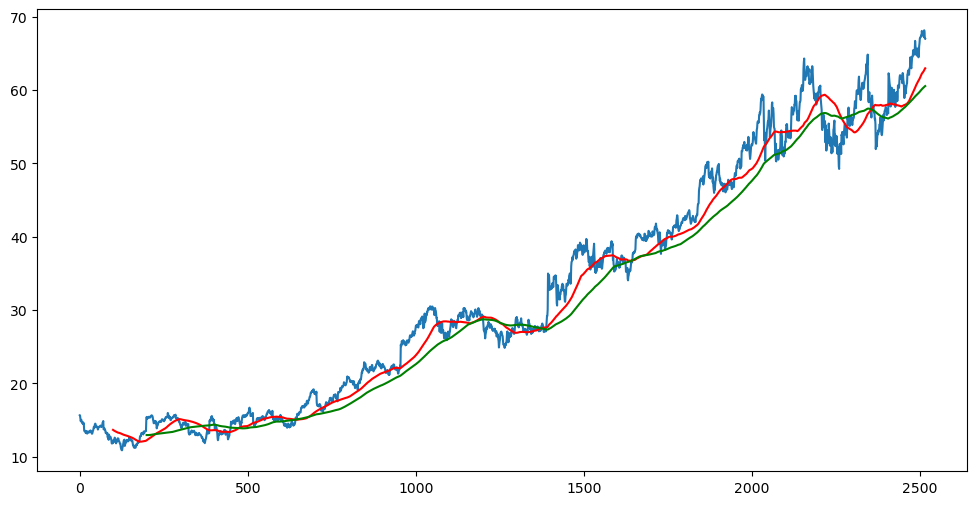

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [11]:
df.shape

(2516, 5)

In [12]:
#splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(755, 1)


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.15434677],
       [0.15211268],
       [0.13937186],
       ...,
       [0.95821596],
       [0.94953861],
       [0.94672171]])

In [15]:
data_training_array.shape

(1761, 1)

In [16]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [17]:
#ML Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [18]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))



model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))



model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [20]:
model.compile(optimizer = 'adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 [==============================] - 19s 263ms/step - loss: 0.0496
Epoch 2/50
52/52 [==============================] - 12s 229ms/step - loss: 0.0093
Epoch 3/50
52/52 [==============================] - 13s 249ms/step - loss: 0.0073
Epoch 4/50
52/52 [==============================] - 12s 237ms/step - loss: 0.0075
Epoch 5/50
52/52 [==============================] - 12s 227ms/step - loss: 0.0074
Epoch 6/50
52/52 [==============================] - 13s 244ms/step - loss: 0.0067
Epoch 7/50
52/52 [==============================] - 12s 227ms/step - loss: 0.0068
Epoch 8/50
52/52 [==============================] - 12s 235ms/step - loss: 0.0061
Epoch 9/50
52/52 [==============================] - 12s 224ms/step - loss: 0.0058
Epoch 10/50
52/52 [==============================] - 19s 363ms/step - loss: 0.0066
Epoch 11/50
52/52 [==============================] - 17s 326ms/step - loss: 0.0057
Epoch 12/50
52/52 [==============================] - 16s 309ms/step - loss: 0.0056
Epoch 13/50
5

In [21]:
model.save('my_finalmodel.keras')


In [22]:
data_testing.head()

,Close
1761,39.6225
1762,40.4005
1763,40.3885
1764,40.6510
1765,41.2605


In [23]:
data_training.tail(100)

,Close
1661,40.3740
1662,40.4245
1663,40.4100
1664,40.3525
1665,40.2980
...,...
1756,40.4840
1757,40.3900
1758,40.4965
1759,40.2285


In [24]:
past_100_days = data_training.tail(100)

In [25]:
final_df = pd.concat([past_100_days, data_testing]).reset_index(drop=True)

In [26]:
final_df.head()

,Close
0,40.3740
1,40.4245
2,40.4100
3,40.3525
4,40.2980


In [27]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.08906032],
       [0.0907181 ],
       [0.0902421 ],
       [0.08835453],
       [0.08656545],
       [0.07873615],
       [0.08567911],
       [0.08129668],
       [0.07620845],
       [0.07177677],
       [0.07118588],
       [0.06627821],
       [0.06250308],
       [0.06565449],
       [0.06992204],
       [0.06352072],
       [0.0601231 ],
       [0.06266721],
       [0.07164547],
       [0.08994666],
       [0.08989741],
       [0.0814444 ],
       [0.05787444],
       [0.07514157],
       [0.05826836],
       [0.06119655],
       [0.07890029],
       [0.07345096],
       [0.06921625],
       [0.07642183],
       [0.08426754],
       [0.10296266],
       [0.10133771],
       [0.08091916],
       [0.09439475],
       [0.09329503],
       [0.08111613],
       [0.08344686],
       [0.07740665],
       [0.08136233],
       [0.07880181],
       [0.08183833],
       [0.0779483 ],
       [0.10038572],
       [0.09249077],
       [0.09610176],
       [0.08347969],
       [0.084

In [28]:
input_data.shape

(855, 1)

In [29]:
x_test =[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [30]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [31]:
#making predictions

y_predicted = model.predict(x_test)

24/24 [==============================] - 3s 73ms/step


In [32]:
y_predicted.shape

(755, 1)

In [33]:
y_test

array([0.06439064, 0.08993024, 0.08953632, 0.09815347, 0.11816167,
       0.12139516, 0.11947476, 0.12579401, 0.12525236, 0.12755027,
       0.12185474, 0.12441526, 0.11678293, 0.12302011, 0.14970866,
       0.15807961, 0.17272056, 0.17030776, 0.15069348, 0.11589659,
       0.10992204, 0.10179729, 0.10675421, 0.10982355, 0.11226918,
       0.12475995, 0.12582684, 0.12612228, 0.13398441, 0.14073041,
       0.14258515, 0.13803857, 0.14599918, 0.15318835, 0.15765285,
       0.1610833 , 0.16049241, 0.15525646, 0.1583094 , 0.15052934,
       0.16970045, 0.15860484, 0.15734099, 0.15437013, 0.16073861,
       0.16482561, 0.17171933, 0.17756914, 0.18278211, 0.18496512,
       0.1890357 , 0.19167829, 0.19556832, 0.18824785, 0.15908084,
       0.15852277, 0.14186295, 0.13447682, 0.13999179, 0.14347148,
       0.15863767, 0.15799754, 0.15524005, 0.16993024, 0.16306935,
       0.15706196, 0.15080181, 0.14588428, 0.14522774, 0.14224046,
       0.14483381, 0.14273287, 0.16727124, 0.16540008, 0.16953

In [34]:
y_predicted

array([[0.15508485],
       [0.15108576],
       [0.14717185],
       [0.1439428 ],
       [0.14193666],
       [0.14176509],
       [0.14362097],
       [0.14727747],
       [0.15236284],
       [0.15819928],
       [0.16425997],
       [0.17002666],
       [0.17500357],
       [0.17873593],
       [0.18098368],
       [0.18212128],
       [0.18282741],
       [0.18404585],
       [0.18629278],
       [0.18942177],
       [0.19252244],
       [0.19453532],
       [0.19447783],
       [0.19177142],
       [0.18659373],
       [0.17985032],
       [0.17302419],
       [0.1674729 ],
       [0.16398042],
       [0.16289414],
       [0.16413261],
       [0.16728073],
       [0.17157874],
       [0.17651653],
       [0.18182687],
       [0.18726869],
       [0.1926105 ],
       [0.19758552],
       [0.20184755],
       [0.20512587],
       [0.20716093],
       [0.20808738],
       [0.20804186],
       [0.20717253],
       [0.20569748],
       [0.20395061],
       [0.202337  ],
       [0.201

In [35]:
scaler.scale_

array([0.03282725])

In [36]:
scale_factor = 1/0.03282725
y_predicted = y_predicted* scale_factor
y_test = y_test *scale_factor

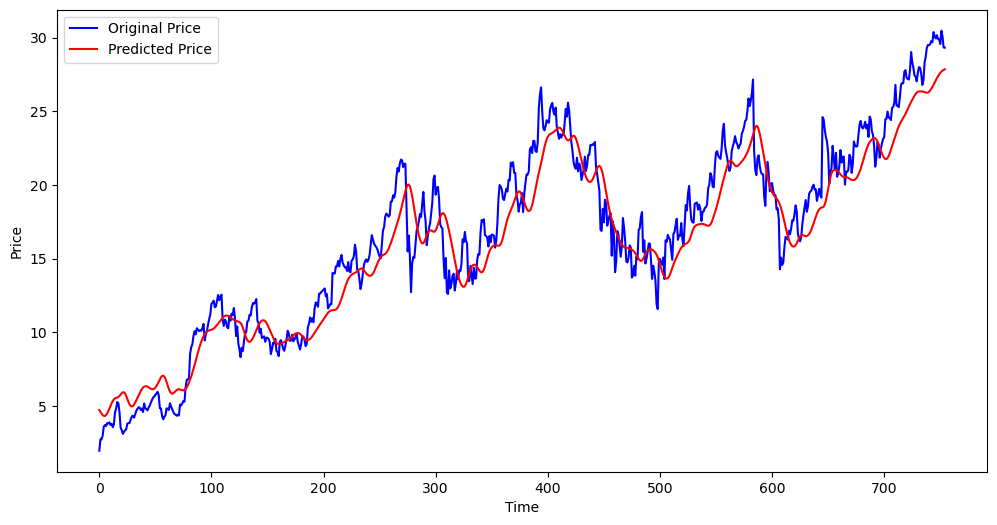

In [37]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [38]:
model.save('my_finalmodel.keras')


In [42]:
import numpy as np
import pandas as pd
import pandas_datareader as data
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD



# Prepare data
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
scaler = MinMaxScaler(feature_range=(0,1))
data_training_array = scaler.fit_transform(data_training)

x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape x_train for Dense network
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1])

# Build a simple feedforward neural network
model = Sequential()

model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

# Using Stochastic Gradient Descent (SGD) as optimizer
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='mean_squared_error')


# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=32)

# Save the model
model.save('my_finalmodel.keras')


Epoch 1/50
52/52 [==============================] - 1s 2ms/step - loss: 0.0135
Epoch 2/50
52/52 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 3/50
52/52 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 4/50
52/52 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 5/50
52/52 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 6/50
52/52 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 7/50
52/52 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 8/50
52/52 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 9/50
52/52 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 10/50
52/52 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 11/50
52/52 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 12/50
52/52 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 13/50
52/52 [==============================

In [43]:
from keras.layers import LSTM

# Reshape the data back for LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)

# Building a more complex LSTM model
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=True), loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=32)

# Save the model
model.save('my_finallmodel.keras')


Epoch 1/100
52/52 [==============================] - 20s 243ms/step - loss: 0.0188
Epoch 2/100
52/52 [==============================] - 16s 313ms/step - loss: 0.0015
Epoch 3/100
52/52 [==============================] - 13s 259ms/step - loss: 0.0012
Epoch 4/100
52/52 [==============================] - 12s 229ms/step - loss: 0.0013
Epoch 5/100
52/52 [==============================] - 11s 220ms/step - loss: 0.0011
Epoch 6/100
52/52 [==============================] - 12s 239ms/step - loss: 0.0013
Epoch 7/100
52/52 [==============================] - 15s 296ms/step - loss: 0.0012
Epoch 8/100
52/52 [==============================] - 16s 305ms/step - loss: 0.0012
Epoch 9/100
52/52 [==============================] - 15s 298ms/step - loss: 0.0012
Epoch 10/100
52/52 [==============================] - 14s 266ms/step - loss: 0.0010
Epoch 11/100
52/52 [==============================] - 12s 224ms/step - loss: 0.0012
Epoch 12/100
52/52 [==============================] - 14s 267ms/step - loss: 0.0010
E

52/52 [==============================] - 13s 255ms/step - loss: 6.4165e-04
Epoch 96/100
52/52 [==============================] - 15s 283ms/step - loss: 6.5023e-04
Epoch 97/100
52/52 [==============================] - 13s 257ms/step - loss: 7.2499e-04
Epoch 98/100
52/52 [==============================] - 13s 253ms/step - loss: 8.0540e-04
Epoch 99/100
52/52 [==============================] - 13s 251ms/step - loss: 6.9084e-04
Epoch 100/100
52/52 [==============================] - 13s 247ms/step - loss: 7.6035e-04
